Let's import the modules:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

## 1. Load data:

In [8]:
tab = pd.read_csv('DataHeight.csv')

## 2. Assigning the age column to the variable x:

In [9]:
x = tab.iloc[:, 1].values.reshape(-1, 1)

## 3. Assigning the height column to the variable y:

In [10]:
y = tab.iloc[:, 2].values

## 4. Plotting the distribution:

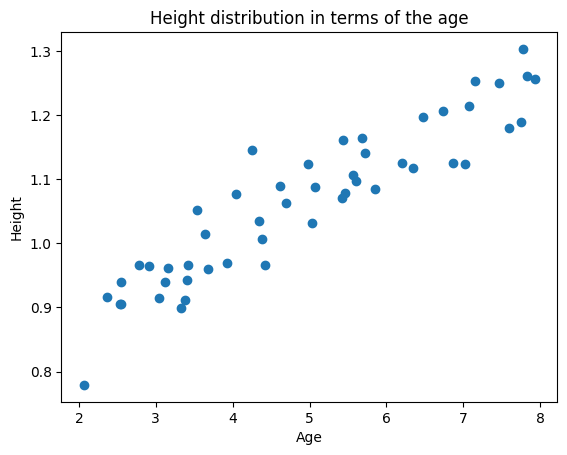

In [11]:
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Height distribution in terms of the age')
plt.show()

## 5. Yes, there is a positive correlation between age and height, because as age increases, height increases as well.

## 6. In order to prove their positive correlation statistically, we need to calculate it using Pearson method:

In [12]:
corr_coeff, p_value = stats.pearsonr(x.flatten(), y)
print(f"Pearson correlation coefficient: {corr_coeff:.2f}")
print(f"P-value: {p_value:.2f}")

Pearson correlation coefficient: 0.93
P-value: 0.00


## 7. Calculating the slope and the intercept:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(f"The intercept: {regressor.intercept_}") 
print(f"The slope: {regressor.coef_[0]}")

The intercept: 0.7583782918575155
The slope: 0.0622093886436249


## 8. Residual error:

In [14]:
y_pred = regressor.predict(X_test)
mse = np.mean((y_test - y_pred)**2) 
print(f"Residual Error = {mse:.2f}")

Residual Error = 0.00


## 9. The regression equation:

In [15]:
print(f"L'equation: {regressor.intercept_} + x * {regressor.coef_[0]}")

L'equation: 0.7583782918575155 + x * 0.0622093886436249


## 10. Plotting the regression equation:

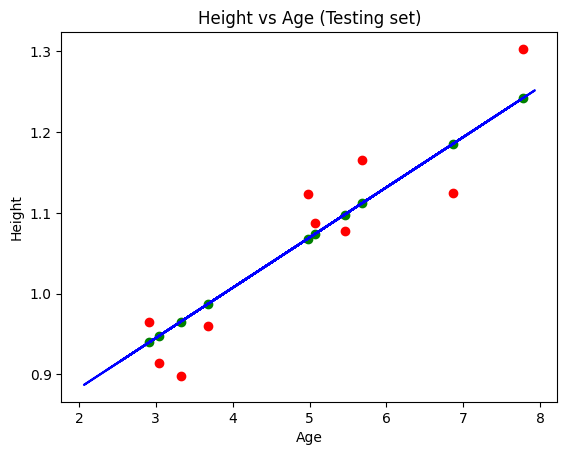

In [16]:
plt.scatter(X_test, y_test, color='red')
plt.scatter(X_test, y_pred, color='green')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title("Height vs Age (Testing set)")
plt.xlabel("Age")
plt.ylabel("Height")
plt.show()

## 11. Predicting the height of the following ages [3, 7, 9, 12]:

In [17]:
new_ages = [3, 7, 9, 12]
x_new = np.array(new_ages).reshape((-1, 1))
y_new = regressor.predict(x_new)
print(y_new)

[0.94500646 1.19384401 1.31826279 1.50489096]


## 12. Predicting the height of 10 year old kid with a confidence interval of 95%:

In [20]:
X_new = 10
y_pred = regressor.coef_[0] * X_new + regressor.intercept_
n = len(x)
t = 1.96
#mse = np.mean((y_test - y_pred)**2) 
std_deviation = np.sqrt(mse)
margin = t * std_deviation
lower = y_pred - margin
upper = y_pred + margin

print(f"The prediction: {y_pred:.2f} m")
print(f"Confidence interval of 95%: [{lower:.2f}, {upper:.2f}] m")

The prediction: 1.38 m
Confidence interval of 95%: [1.29, 1.47] m
